## Importing the Dependencies


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE

## Data Collection & Preprocessing


In [2]:
# loading the dataset
df = pd.read_csv('mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [43]:
# Count the number of ham emails
df.shape

(5572, 2)

In [44]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
# label spam mail as 0;  ham mail as 1;

df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1
# Convert the 'Category' column to numeric data type
df['Category'] = df['Category'].astype(int)

df.dtypes

Category     int32
Message     object
dtype: object

## Univariate Analysis

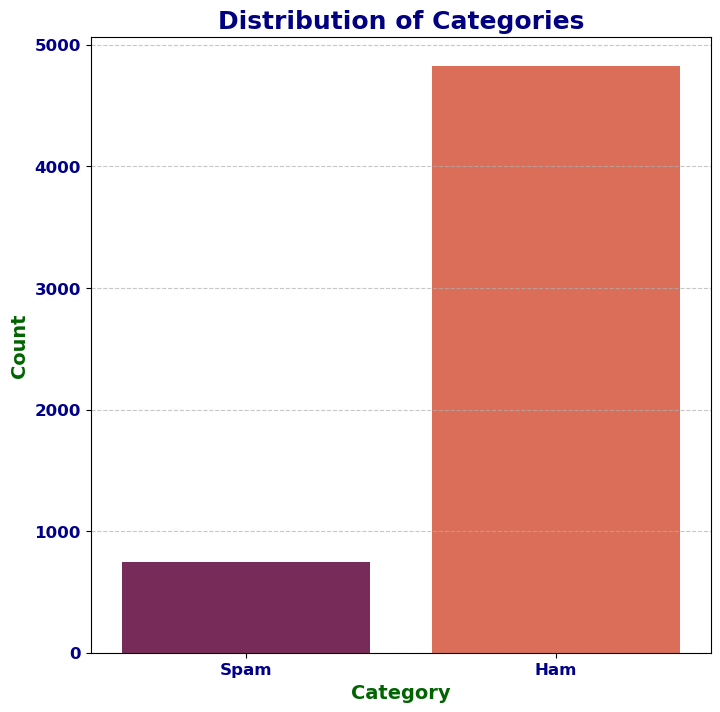

In [5]:
# Distribution of Categories

plt.figure(figsize=(8,8))
sns.countplot(x='Category',data=df, palette='rocket')
plt.title('Distribution of Categories', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Category', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(ticks=[0, 1], labels=['Spam', 'Ham'], fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 

## Bivariate Analysis

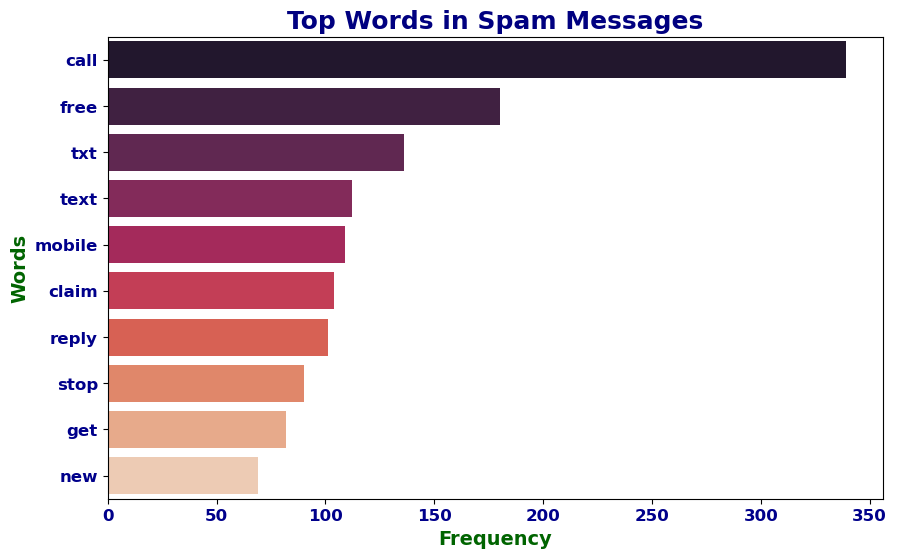

In [6]:
from collections import Counter
from nltk.corpus import stopwords
import re

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Combine all spam messages into a single string
all_spam_messages = ' '.join(df[df['Category'] == 0]['Message'].str.lower())
# Define a function to filter out words based on criteria
def filter_words(word):
    return word.isalnum() and len(word) >= 3 and word not in stop_words

# Split the text into words and apply the filter function
words = all_spam_messages.split()
words = filter(filter_words, words)

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top words by frequency
top_words = word_counts.most_common(10)

# Extract words and counts
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='rocket')
plt.title('Top Words in Spam Messages', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Words', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')
plt.show()

In [7]:
# separating the data as texts and label

X = df['Message']

Y = df['Category']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## Feature Extraction

In [9]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)


X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')



## Training the Model

## Logistic Regression

In [38]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Balancing the training data using SMOTE
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X_train_features, Y_train)
print(X_resampled.shape)
print(Y_resampled.shape)

(7730, 7431)
(7730,)


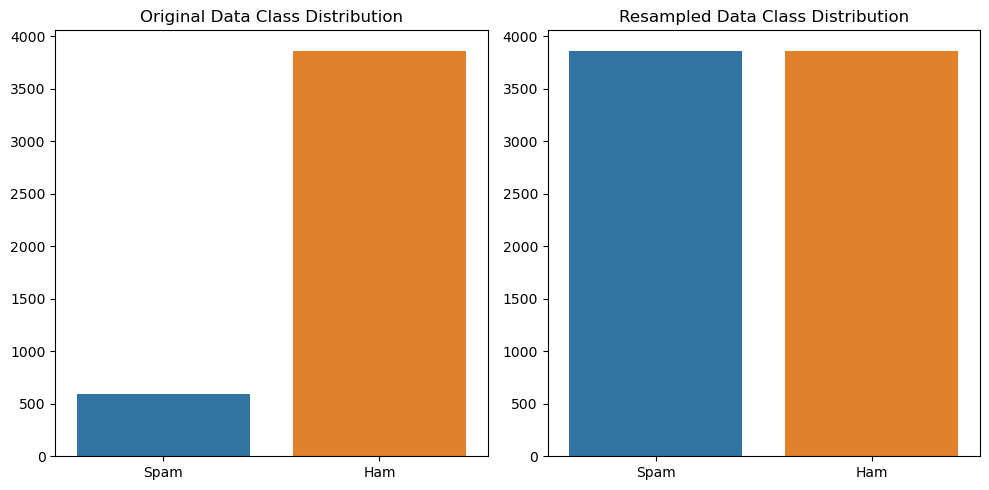

In [11]:
original_class_counts = np.bincount(Y_train)
resampled_class_counts = np.bincount(Y_resampled)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=['Spam', 'Ham'], y=original_class_counts)
plt.title('Original Data Class Distribution')

plt.subplot(1, 2, 2)
sns.barplot(x=['Spam', 'Ham'], y=resampled_class_counts)
plt.title('Resampled Data Class Distribution')

plt.tight_layout()
plt.show()

In [12]:
model=LogisticRegression()

In [13]:
# Training the Logistic Regression model with the resampled data

model.fit(X_resampled, Y_resampled)

LogisticRegression()

In [15]:
# Get model coefficients
coefficients = model.coef_[0]
feature_names = feature_extraction.get_feature_names_out()

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Filter features associated with spam
coefficients_df = coefficients_df[coefficients > 0]  # Assuming positive coefficients indicate association with spam

# Sort the DataFrame by coefficient values to see the most important features for spam
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the top features associated with spam and their coefficients
print("Top features associated with spam:")
print(coefficients_df.head(10))

Top features associated with spam:
     Feature  Coefficient
4729      ok     2.249369
3133      gt     2.148159
4104      lt     2.143396
4014      ll     2.141507
3332    home     1.853880
2065      da     1.811635
1837    come     1.672606
3882   later     1.662162
7124     way     1.631844
3081     got     1.625303


## Evaluating the trained model

In [16]:
# Prediction and evaluation on training data
prediction_on_training_data = model.predict(X_resampled)
accuracy_on_training_data = accuracy_score(Y_resampled, prediction_on_training_data)
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 0.9941785252263907


In [17]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [18]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9838565022421525


In [19]:
## ROC AUC Curve

Y_pred_proba = model.predict_proba(X_test_features)[:,1]
roc_auc = roc_auc_score(Y_test, Y_pred_proba,)
print("ROC AUC Score:", roc_auc)
print(Y_pred_proba)
print(Y_test)

ROC AUC Score: 0.9937029569892474
[0.03287188 0.94485299 0.25732105 ... 0.95228645 0.97618353 0.90280922]
2632    0
454     1
983     0
1282    1
4610    1
       ..
4827    1
5291    1
3325    1
3561    1
1136    1
Name: Category, Length: 1115, dtype: int32


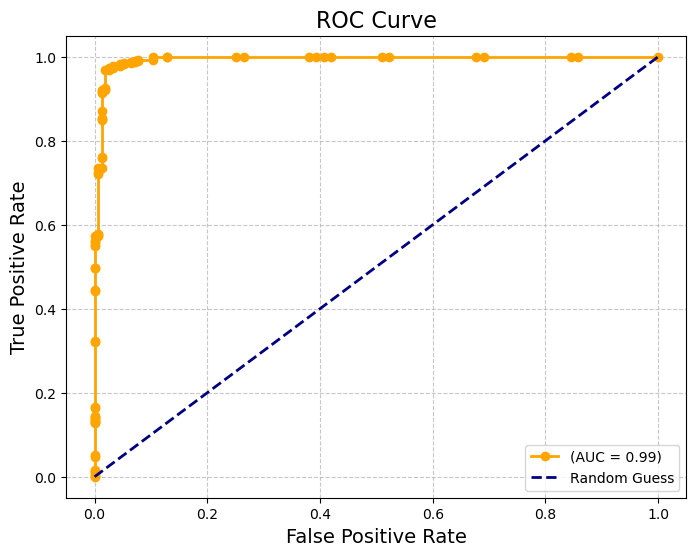

In [20]:

fpr, tpr,_ = roc_curve(Y_test, Y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange',marker= 'o',lw=2,label=f'(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [21]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_proba)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)
print("AUC Score:", auc_score)

AUC Score: 0.9988047378434545


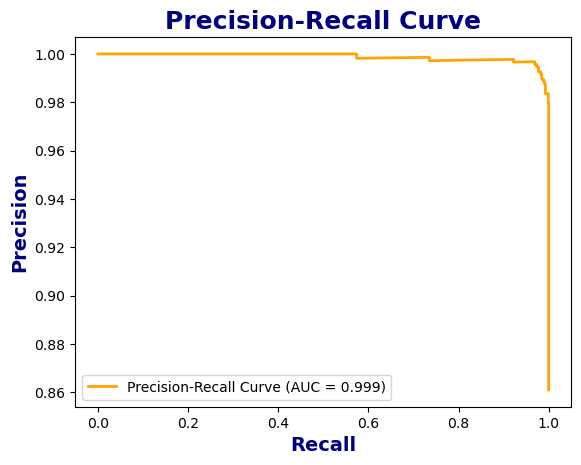

In [22]:

plt.plot(recall, precision, lw=2,color='orange', label=f'Precision-Recall Curve (AUC = {auc_score:.3f})')

plt.xlabel('Recall', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('Precision', fontsize=14, fontweight='bold', color='navy')
plt.title('Precision-Recall Curve', fontsize=18, fontweight='bold', color='navy')
plt.legend()
plt.show()

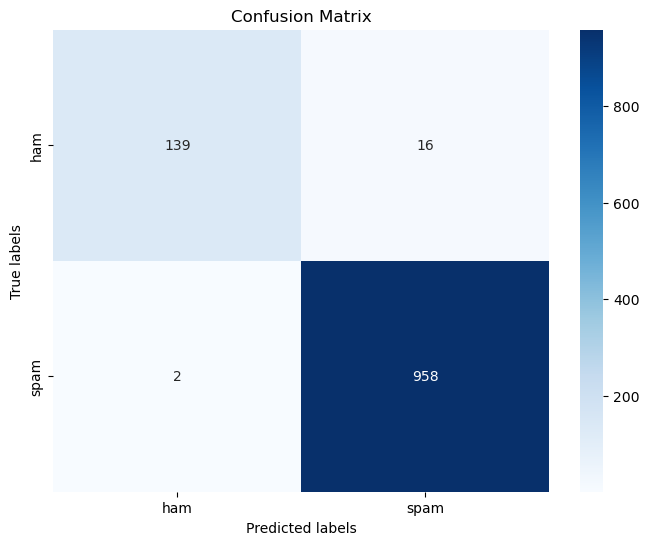

In [24]:
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:

print("Classification Report:\n", classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       155
           1       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Naive Bayes

In [36]:
from sklearn.naive_bayes import BernoulliNB

In [38]:

# Training the Naive Bayes model
naive_bayes_model = BernoulliNB()
naive_bayes_model.fit(X_resampled, Y_resampled)

BernoulliNB()

In [39]:
# Prediction on training data
train_predictions = naive_bayes_model.predict(X_resampled)
train_accuracy = accuracy_score(Y_resampled, train_predictions)
print('Accuracy on training data:', train_accuracy)

Accuracy on training data: 0.9899094437257439


In [40]:
# Prediction on test data

test_predictions = naive_bayes_model.predict(X_test_features)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on test data:', test_accuracy)

Accuracy on test data: 0.9811659192825112


In [41]:
# ROC AUC Curve
Y_pred_proba = naive_bayes_model.predict_proba(X_test_features)[:, 1]
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9986760752688172


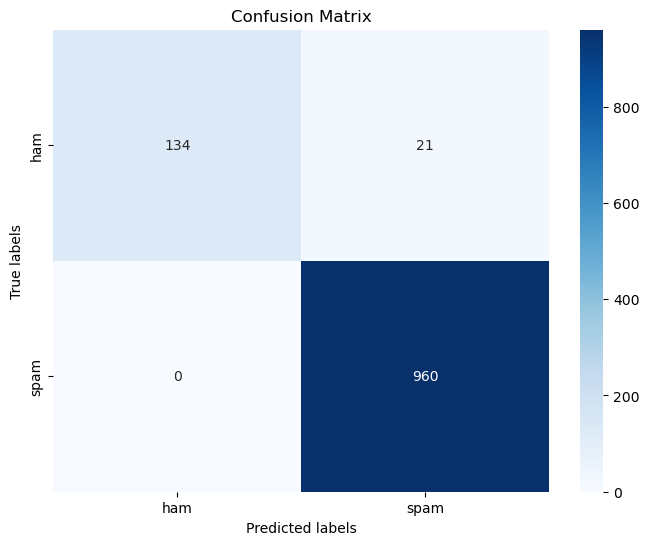

In [42]:
cm = confusion_matrix(Y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Classification Report
print("Classification Report:\n", classification_report(Y_test, prediction_on_test_data))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       155
           1       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

